Trading Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'History.csv'  # Ensure this is the correct path to your file
trades = pd.read_csv(file_path)

# Display the first few rows of the dataframe
trades.head()


,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,VALUE DATE,STAKE,PRICE,BOUNDARY PRICE,...,SETTLEMENT PRICE,RESULT,PAYOUT,TYPE.1,EXPIRY.1,STRIKE PRICE,SETTLEMENT.1,SETTLEMENT PRICE.1,PROFIT,LOSS
0,11 Dec 2024 20:23:08,Close Bet,O2-DD-9DMMLN,T2-DD-5PN26R,O2-DD-9DMLRC,US NDAQ 100 - Cash,-,0.3,"21,776.24",-,...,-,-,-,-,-,-,-,-,-,-
1,11 Dec 2024 20:23:08,Close Bet,O2-DD-9DMMLN,T2-DD-5PN26Q,O2-DD-9DMKTD,US NDAQ 100 - Cash,-,0.3,"21,776.24",-,...,-,-,-,-,-,-,-,-,-,-
2,11 Dec 2024 19:49:13,Stop Loss,O2-DD-9DMFYN,T2-DD-5PN19E,-,US NDAQ 100 - Cash,-,0.3,"21,755.01",-,...,-,-,-,-,-,-,-,-,-,-
3,11 Dec 2024 19:38:48,Close Bet,O2-DD-9DMHJ3,T2-DD-5PN0ZK,O2-DD-9DM8YR,US NDAQ 100 - Dec 2024,-,0.3,"21,807.13",-,...,-,-,-,-,-,-,-,-,-,-
4,11 Dec 2024 18:26:23,Close Bet,O2-DD-9DM7RN,T2-DD-5PMY82,O2-DD-9DM7PN,Euro 50 - Cash,-,2.0,"4,970.0",-,...,-,-,-,-,-,-,-,-,-,-


In [2]:
import pandas as pd

# Load your trading data
file_path = 'History.csv'  # Ensure this is the correct path to your file
trades = pd.read_csv(file_path)

# Define a mapping dictionary for product names
product_mapping = {
    'Japan 225 - Cash': 'NKY',
    'US 30 - Cash': 'DJI',
    'Crude Oil West Texas - Cash': 'CL',
    'US NDAQ 100 - Cash': 'NQ',
    'Gold - Cash': 'GC',
    'Crude Oil West Texas - Jan 2025': 'CL_Fut',
    'Japan 225 - Dec 2024': 'NKY_Fut',
    'Gasoline - Cash': 'RBOB',
    'US T-Note 10 YR - Cash': 'TNote_10yr',
    'AUD/USD': 'AUDUSD',
    'Heating Oil - Cash': 'HO',
    'US NDAQ 100 - Dec 2024': 'NQ_Fut',
    'EU Natural Gas (TTF) - Jan 2025': 'TTF',
    'Euro 50 - Cash': 'SX5E',
    'Germany 40 - Cash': 'DAX',
    'Copper - Cash': 'Copper',
    'Soybean - Cash': 'SOYA'
}

# Replace product names in the DataFrame
trades['PRODUCT'] = trades['PRODUCT'].replace(product_mapping)

# Define a function to check if a column should be deleted
def should_drop_column(column):
    return (column.isnull().all() or (column == '-').all())

# Identify columns to drop
columns_to_drop = [col for col in trades.columns if should_drop_column(trades[col])]

# Drop the identified columns
trades.drop(columns=columns_to_drop, inplace=True)

# Save the refined DataFrame to a new CSV file
trades.to_csv('refined_history.csv', index=False)

# Display the remaining columns for verification
print(f"Columns dropped: {columns_to_drop}")
print("Remaining columns:")
print(trades.columns)


Columns dropped: ['VALUE DATE', 'BOUNDARY PRICE', 'STOP LOSS', 'TAKE PROFIT', 'MARGIN (GBP)', 'AMOUNT EXCLUDING FEE', 'FEE', 'HOLDING COST - AMOUNT', 'HOLDING RATE', 'HOLDING COST (GBP)', 'HOLDING COST - OFFSET (GBP)', 'HOLDING COST - TOTAL (GBP)', 'PREMIUM', 'REFUND %', 'TARGET', 'WIN PAYOUT', 'DRAW PAYOUT', 'OPEN', 'EXPIRY', 'SETTLEMENT', 'SETTLEMENT PRICE', 'RESULT', 'PAYOUT', 'TYPE.1', 'EXPIRY.1', 'STRIKE PRICE', 'SETTLEMENT.1', 'SETTLEMENT PRICE.1', 'PROFIT', 'LOSS']
Remaining columns:
Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'AMOUNT (GBP)', 'BALANCE (GBP)'],
      dtype='object')


In [3]:
# let's check the working directory (CWD current WD)
import os
print(os.getcwd())
# actually we specified just the filename with file_path ='History.csv'. That's the relative path isntead of absoulte path C:\\Users\\user\\Documents\\Algo Trading\\Trading Analytics
# if we need the change the CWD we type the script below
# import os
# os.chdir('C:\\Users\\user\\Documents\\Algo Trading\\Trading Analytics')



c:\Users\user\Documents\Algo Trading\Trading Analytics


In [4]:
# Check the columns and data types
print(trades.info())

# Check for missing values
print(trades.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE/TIME      605 non-null    object 
 1   TYPE           605 non-null    object 
 2   ORDER#         605 non-null    object 
 3   BET#           605 non-null    object 
 4   REL. ORDER#    605 non-null    object 
 5   PRODUCT        605 non-null    object 
 6   STAKE          605 non-null    float64
 7   PRICE          605 non-null    object 
 8   VALUE (GBP)    605 non-null    object 
 9   AMOUNT (GBP)   605 non-null    float64
 10  BALANCE (GBP)  605 non-null    object 
dtypes: float64(2), object(9)
memory usage: 52.1+ KB
None
DATE/TIME        0
TYPE             0
ORDER#           0
BET#             0
REL. ORDER#      0
PRODUCT          0
STAKE            0
PRICE            0
VALUE (GBP)      0
AMOUNT (GBP)     0
BALANCE (GBP)    0
dtype: int64


In [5]:
# Total number of trades
total_trades = len(trades)
print(f'Total Number of Trades: {total_trades}')


Total Number of Trades: 605


In [6]:
# Calculate win rate
wins = trades[trades['AMOUNT (GBP)'] > 0]  # Replace 'Profit' with your actual profit/loss column name
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 45.62%


In [7]:
# Rename the 'AMOUNT (GBP)' column to 'PL'
trades.rename(columns={'AMOUNT (GBP)': 'PL'}, inplace=True)

# Save the refined DataFrame to a new CSV file
trades.to_csv('refined_history.csv', index=False)


In [8]:
print(trades.columns)

Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'PL', 'BALANCE (GBP)'],
      dtype='object')


In [9]:
trades.head()

,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,STAKE,PRICE,VALUE (GBP),PL,BALANCE (GBP)
0,11 Dec 2024 20:23:08,Close Bet,O2-DD-9DMMLN,T2-DD-5PN26R,O2-DD-9DMLRC,NQ,0.3,"21,776.24","6,532.87",0.91,"99,367.77"
1,11 Dec 2024 20:23:08,Close Bet,O2-DD-9DMMLN,T2-DD-5PN26Q,O2-DD-9DMKTD,NQ,0.3,"21,776.24","6,532.87",2.26,"99,366.86"
2,11 Dec 2024 19:49:13,Stop Loss,O2-DD-9DMFYN,T2-DD-5PN19E,-,NQ,0.3,"21,755.01","6,526.50",-2.71,"99,364.60"
3,11 Dec 2024 19:38:48,Close Bet,O2-DD-9DMHJ3,T2-DD-5PN0ZK,O2-DD-9DM8YR,NQ_Fut,0.3,"21,807.13","6,542.13",-0.23,"99,367.31"
4,11 Dec 2024 18:26:23,Close Bet,O2-DD-9DM7RN,T2-DD-5PMY82,O2-DD-9DM7PN,SX5E,2.0,"4,970.0","9,940.00",-3.20,"99,367.54"


In [10]:
trades.describe()

,STAKE,PL
count,605.000000,605.000000
mean,1.259174,-1.021455
std,2.177406,53.217809
min,0.100000,-516.000000
25%,0.300000,-9.250000
50%,0.500000,-0.690000
75%,1.500000,6.900000
max,20.000000,581.600000


In [11]:
# This will ignore any errors for columns that don't exist
trades.drop(columns=['VALUE DATE','BOUNDARY PRICE', 'STOP LOSS',
       'TAKE PROFIT', 'MARGIN (GBP)'], 
               inplace=True, errors='ignore')

We have cleaned the history file and name the new file as "refined_history.csv". It's the file we are working with. Let's progress!

In [12]:
total_trades = len(trades)
wins = trades[trades['PL'] > 0]
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 45.62%


EDA

Distribution of P&L

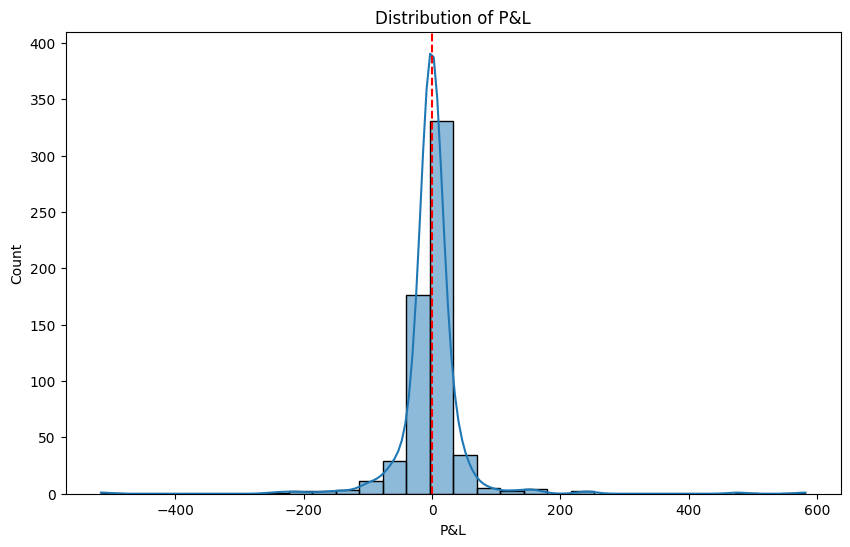

In [13]:
#Visualize the distribution of P&L values.
plt.figure(figsize=(10, 6))
sns.histplot(trades['PL'], bins=30, kde=True)
plt.title('Distribution of P&L')
plt.xlabel('P&L')
plt.axvline(0, color='red', linestyle='--') # Highlight break-even point<br>plt.show()



Cumulative Profit Curve

Win Rate Visualization

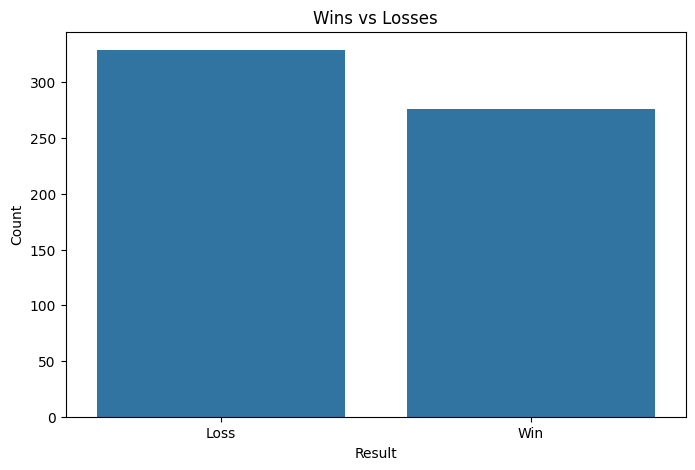

In [14]:
# Visualize the number of wins and losses
win_counts = trades['PL'].apply(lambda x: 'Win' if x > 0 else 'Loss').value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title('Wins vs Losses')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Average P&L per Trade

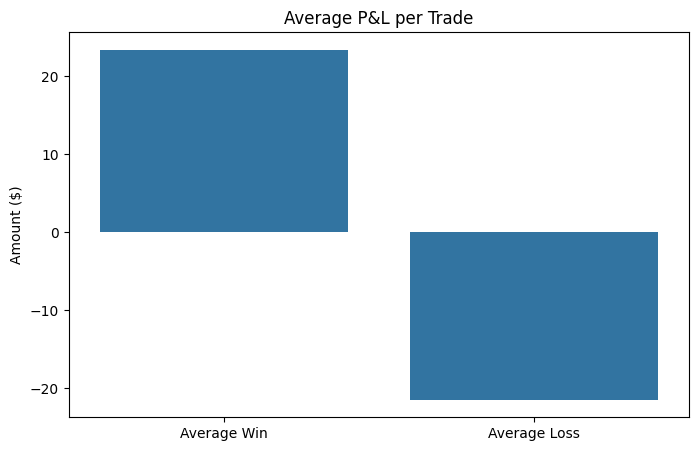

In [15]:
# Show average P&L for wins and losses
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=['Average Win', 'Average Loss'], y=[avg_win, avg_loss])
plt.title('Average P&L per Trade')
plt.ylabel('Amount ($)')
plt.show()

In [16]:
# Calculate and print average win and loss
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()

# Display the results
print(f'Average win per trade: ${avg_win:.2f}')
print(f'Average loss per trade: ${avg_loss:.2f}')


Average win per trade: $23.41
Average loss per trade: $-21.52


To improve the appearance of your Cumulative Profit Curve and make it more readable, you can take the following steps:

Ensure Dates are Sorted: Make sure your DataFrame is sorted by date, so the cumulative profit is plotted in the correct order.

Format the X-axis: Use date formatting to reduce clutter, showing only a few key dates instead of every date.

Reduce Gridlines: You can adjust the gridlines to make the graph less cluttered.

Step 1: Sort the DataFrame by Date
Make sure your DataFrame is sorted by the date column. Assuming your date column is named 'DATE/TIME', you can do this:

In [17]:
# Convert 'DATE/TIME' to datetime format if it’s not already
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Sort the DataFrame by date
trades.sort_values(by='DATE/TIME', inplace=True)

Step 2: Plot the Cumulative Profit Curve
Now, modify the plotting code to enhance readability:

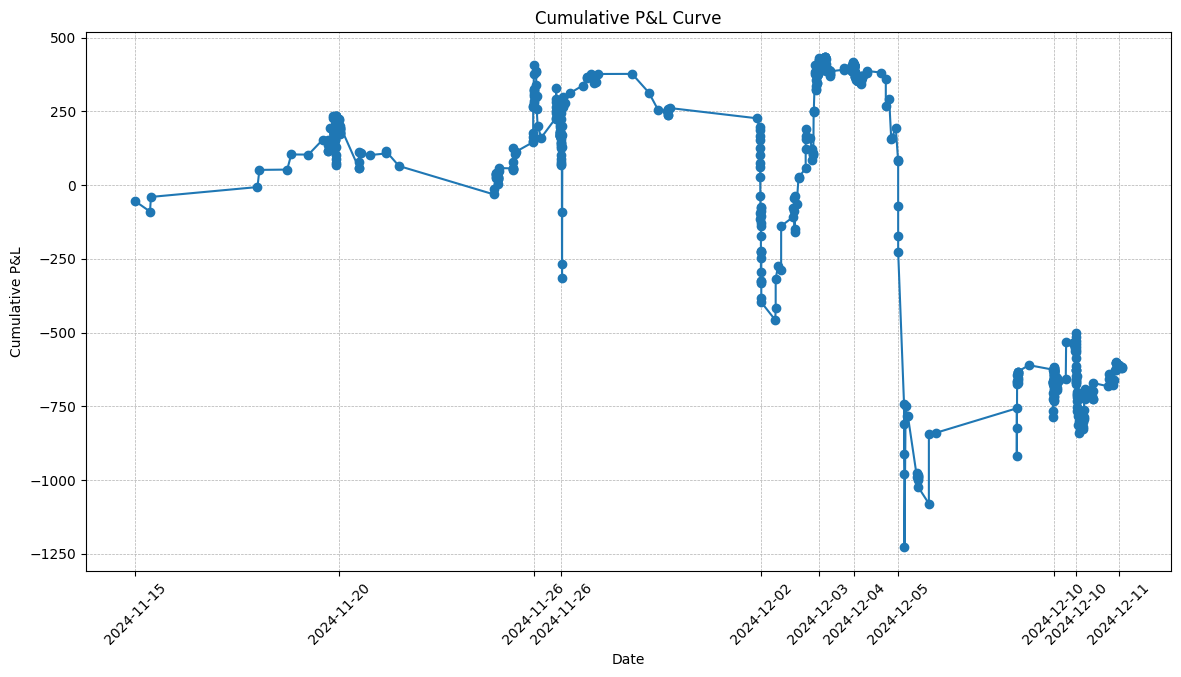

In [18]:
# Calculate Cumulative PL
trades['Cumulative PL'] = trades['PL'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(trades['DATE/TIME'], trades['Cumulative PL'], marker='o', linestyle='-')
plt.title('Cumulative P&L Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')

# Set x-axis format to show fewer ticks
plt.xticks(ticks=trades['DATE/TIME'][::len(trades)//10], rotation=45)  # Show every 10th date for clarity

# Adjust gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.5)  # Change line style and width
plt.show()


# EDGE ANALYSIS

In [19]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $23.41
Average Loss: $-21.52
Expectancy: $-1.02


In [20]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Calculate risk-to-reward ratio
risk_to_reward_ratio = abs(average_loss / average_win) if average_win != 0 else None

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')
print(f'Risk-to-Reward Ratio: {risk_to_reward_ratio:.2f}' if risk_to_reward_ratio is not None else 'Risk-to-Reward Ratio: Undefined (Average Win is zero)')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $23.41
Average Loss: $-21.52
Expectancy: $-1.02
Risk-to-Reward Ratio: 0.92


# Update github

Navigate to Your Project Directory: Make sure you are in the correct directory where your Git repository is located (e.g., C:\Users\user\Documents\Algo Trading\Trading Analytics). Use the cd command to change directories:

cd "C:\Users\user\Documents\Algo Trading\Trading Analytics"

Check Git Status Again: After changing to the correct directory, run:

git status

You should see the status of your Git repository, including any changes you've made.

Stage Your Changes: If you see the modified files that you want to commit, stage them using:

git add .

Commit Your Changes: After staging, commit your changes:

git commit -m "overall stats and edge"

1/ can i do a new commit before git push. 2/ or can i delete the previous commit or change it 3/ if yes do i have to do git add again 4/ what's best practice if i make a mistake with git commit (do new git commit , delete previous, or it does mkatter as long as i have not done git push)
Great questions! Let’s go through each of your queries step-by-step:

1. Can I do a new commit before git push?
Yes, you can create a new commit at any time before you push to the remote repository. Each commit is independent, and you can have multiple commits waiting to be pushed.

2. Can I delete the previous commit or change it?
Yes, you can modify the last commit using the following methods:

Amend the Last Commit: If you want to change the last commit (e.g., to modify the commit message or add changes), you can use:

git commit --amend

This will allow you to modify the last commit. You may need to stage any new changes with git add before using this command.

Delete the Last Commit: If you want to remove the last commit entirely and reset your branch to the previous state, you can use:

git reset --soft HEAD~1

This will keep your changes in the working directory (unstaged), allowing you to recommit them if needed.

If you prefer to discard the changes along with the commit:

git reset --hard HEAD~1

3. If yes, do I have to do git add again?
If you use git commit --amend, you should stage any new changes with git add before amending.
If you use git reset --soft HEAD~1, your changes remain in the working directory, so you can modify and stage them again as needed.
If you use git reset --hard HEAD~1, your changes will be lost, and you would not need to do git add again since there would be no changes.
4. What's best practice if I make a mistake with git commit?
The best practice depends on the situation:

If you need to change the last commit: Use git commit --amend if it's a minor change (like fixing a typo in the commit message or adding a small change).

If you want to start over with the last commit: Use git reset --soft HEAD~1 to keep your changes for further editing or git reset --hard HEAD~1 if you want to discard everything and start fresh.

If everything is correct: If you haven’t pushed yet and everything looks good, simply continue working as planned. You can always make new commits as needed.

# Edge per product

In [21]:
import pandas as pd

# Load your trading data (assuming it's already done)
# trades = pd.read_csv('refined_history.csv')

# Get unique products from the 'PRODUCT' column
unique_products = trades['PRODUCT'].unique().tolist()

# Display the unique products
print(f"PRODUCTS = {unique_products}")


PRODUCTS = ['CL', 'USD/JPY', 'DJI', 'GC', 'AUDUSD', 'USD/CAD', 'CL_Fut', 'GBP/JPY', 'NKY', 'NQ', 'TNote_10yr', 'HO', 'RBOB', 'GBP/USD', 'DAX', 'NKY_Fut', 'TTF', 'USD/CHF', 'NQ_Fut', 'SOYA', 'SX5E', 'Copper']


In [22]:
filtered_trades = trades[trades['PRODUCT'].isin(unique_products)]


In [23]:
# Count the number of unique products
num_unique_products = trades['PRODUCT'].nunique()

# Display the result
print(f'Number of unique products: {num_unique_products}')




Number of unique products: 22


In [24]:
results = []

# Calculate the overall total trades across all products
overall_total_trades = len(trades)

for product in unique_products:
    product_data = trades[trades['PRODUCT'] == product]
    total_trades = len(product_data)  # Total trades (wins + losses)
    
    wins = product_data[product_data['PL'] > 0]
    losses = product_data[product_data['PL'] <= 0]

    win_count = len(wins)
    loss_count = len(losses)

    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
    edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

    # Calculate percentage of total trades for this product and round it to 2 decimal places
    percentage_of_total_trades = round((total_trades / overall_total_trades) * 100, 2) if overall_total_trades > 0 else 0

    # Calculate RRR (Average Win / Average Loss)
    rrr = average_win / abs(average_loss) if average_loss != 0 else None

    # Append results to the DataFrame including Total Trades, Percentage, and RRR
    results.append({
        'Product': product,
        'Total Trades': total_trades,  # Total number of trades for this product
        '% of Total Trades': percentage_of_total_trades,  # New column for percentage rounded
        'Wins': win_count,
        'Average Win': average_win,
        'Losses': loss_count,
        'Average Loss': average_loss,
        'Edge': edge,
        '% Win': win_rate,
        'RRR': rrr,  # New column for Risk-to-Reward Ratio
    })

summary_df = pd.DataFrame(results)
print(summary_df)


       Product  Total Trades  % of Total Trades  Wins  Average Win  Losses  \
0           CL            81              13.39    37    26.325946      44   
1      USD/JPY            16               2.64     7    18.671429       9   
2          DJI           109              18.02    48    26.394375      61   
3           GC            44               7.27    23    15.160870      21   
4       AUDUSD             4               0.66     2    17.495000       2   
5      USD/CAD             9               1.49     2    14.000000       7   
6       CL_Fut            18               2.98    10    12.765000       8   
7      GBP/JPY            32               5.29    16    21.398125      16   
8          NKY           163              26.94    73    33.349589      90   
9           NQ            72              11.90    38    14.950789      34   
10  TNote_10yr             6               0.99     4     4.670000       2   
11          HO             3               0.50     2     2.5500

In [25]:
# Calculate percentage of total trades for this product
percentage_of_total_trades = round((total_trades / overall_total_trades) * 100, 2) if overall_total_trades > 0 else 0

# Append results to the DataFrame including Total Trades and Percentage
results.append({
    'Product': product,
    'Total Trades': total_trades,
    '% of Total Trades': percentage_of_total_trades,  # New column for percentage rounded
    'Wins': win_count,
    'Average Win': average_win,
    'Losses': loss_count,
    'Average Loss': average_loss,
    'Edge': edge,
    '% Win': win_rate,
})


In [26]:
import pandas as pd

# Assuming summary_df is already created and contains your edge data

# Specify the path to your refined_history file
refined_history_path = 'refined_history.xlsx'  # Update with the actual path if necessary

# Create an Excel writer object (this will create a new file if it doesn't exist)
with pd.ExcelWriter(refined_history_path, engine='openpyxl') as writer:
    # Write the summary_df to a new sheet named 'edges'
    summary_df.to_excel(writer, sheet_name='edges', index=False)

print("Data saved to 'refined_history.xlsx' in the 'edges' sheet.")



Data saved to 'refined_history.xlsx' in the 'edges' sheet.


In [27]:
refined_history_path = r'C:\Users\user\Documents\Algo Trading\refined_history.xlsx'


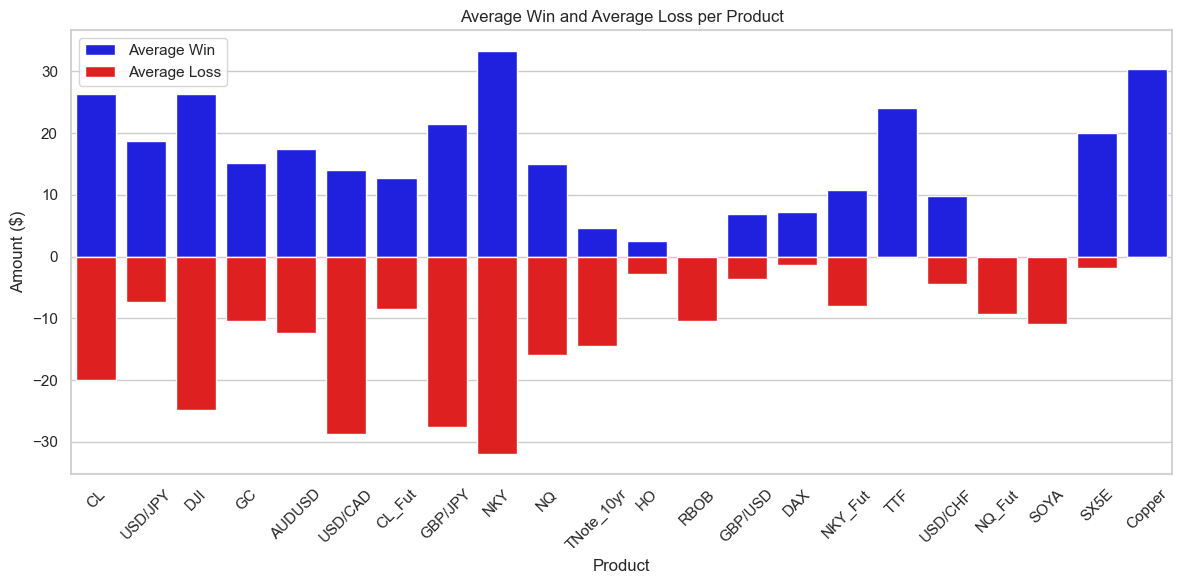

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot Average Win vs Average Loss
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Average Win', data=summary_df, color='blue', label='Average Win')
sns.barplot(x='Product', y='Average Loss', data=summary_df, color='red', label='Average Loss')

plt.title('Average Win and Average Loss per Product')
plt.xlabel('Product')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15768\2318123739.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(summary_df['Product'], rotation=45)


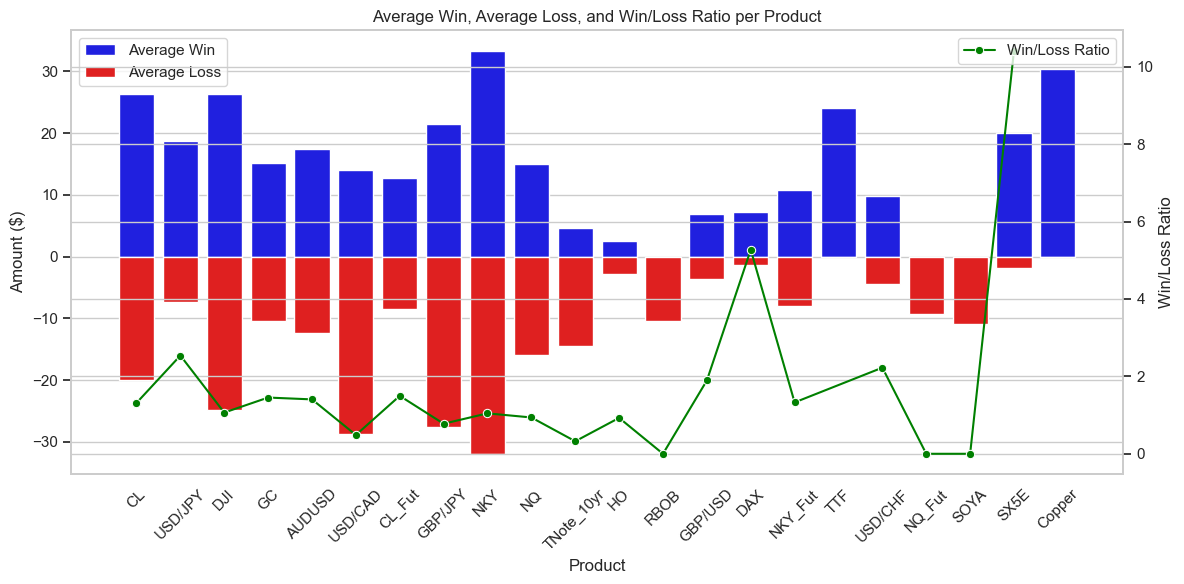

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the ratio of Average Win to Average Loss
summary_df['Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Average Win and Average Loss
sns.barplot(x='Product', y='Average Win', data=summary_df, color='blue', ax=ax1, label='Average Win')
sns.barplot(x='Product', y='Average Loss', data=summary_df, color='red', ax=ax1, label='Average Loss')

# Set the labels and title
ax1.set_title('Average Win, Average Loss, and Win/Loss Ratio per Product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Amount ($)')
ax1.set_xticklabels(summary_df['Product'], rotation=45)
ax1.legend(loc='upper left')

# Create a secondary axis for the Win/Loss Ratio
ax2 = ax1.twinx()
sns.lineplot(x='Product', y='Win/Loss Ratio', data=summary_df, color='green', marker='o', ax=ax2, label='Win/Loss Ratio')

# Set the secondary axis label
ax2.set_ylabel('Win/Loss Ratio')

# Show the legend for the secondary axis
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


In [30]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming you already have the summary_df DataFrame with the necessary columns

# # Calculate average win/average loss ratio
# summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# # Set the style for seaborn
# sns.set(style="whitegrid")

# # Create a scatter plot
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='% Win', y='Average Win/Loss Ratio', data=summary_df, color='blue', s=100)

# # Set titles and labels
# plt.title('Average Win/Loss Ratio vs % Win per Product')
# plt.xlabel('% Win')
# plt.ylabel('Average Win/Loss Ratio')

# # Annotate each point with the product name
# for i in range(len(summary_df)):
# plt.text(summary_df['% Win'][i], summary_df['Average Win/Loss Ratio'][i],
# summary_df['Product'][i], horizontalalignment='left', size='medium', color='black')

# # Show gridlines for better readability
# plt.grid(True)

# # Show the plot
# plt.tight_layout()
# plt.show()

In [31]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming you already have the summary_df DataFrame with the necessary columns

# # Calculate average win/average loss ratio
# summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# # Exclude products 'DAX' and 'SX5E'
# filtered_summary_df = summary_df[~summary_df['Product'].isin(['DAX', 'SX5E','NQ_Fut'])]

# # Set the style for seaborn
# sns.set(style="whitegrid")

# # Create a scatter plot
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='% Win', y='Average Win/Loss Ratio', data=filtered_summary_df, color='blue', s=100)

# # Set titles and labels
# plt.title('Average Win/Loss Ratio vs % Win per Product (Excluding DAX, NQ fut and SX5E)')
# plt.xlabel('% Win')
# plt.ylabel('Average Win/Loss Ratio')

# # Annotate each point with the product name
# for i in range(len(filtered_summary_df)):
#     plt.text(filtered_summary_df['% Win'].iloc[i], 
#              filtered_summary_df['Average Win/Loss Ratio'].iloc[i], 
#              filtered_summary_df['Product'].iloc[i], 
#              horizontalalignment='left', size='medium', color='black')

# # Show gridlines for better readability
# plt.grid(True)

# # Show the plot
# plt.tight_layout()
# plt.show()



# Bubble chart
A variation of the scatter plot where a third variable is represented by the size of the bubbles. You could use the total trades as the bubble size.

In [32]:
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='% Win', y='Average Win/Loss Ratio', size='Total Trades', sizes=(50, 500), data=summary_df, color='blue', legend=False)
# plt.title('Average Win/Loss Ratio vs % Win per Product (Bubble Size = Total Trades)')
# plt.xlabel('% Win')
# plt.ylabel('Average Win/Loss Ratio')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


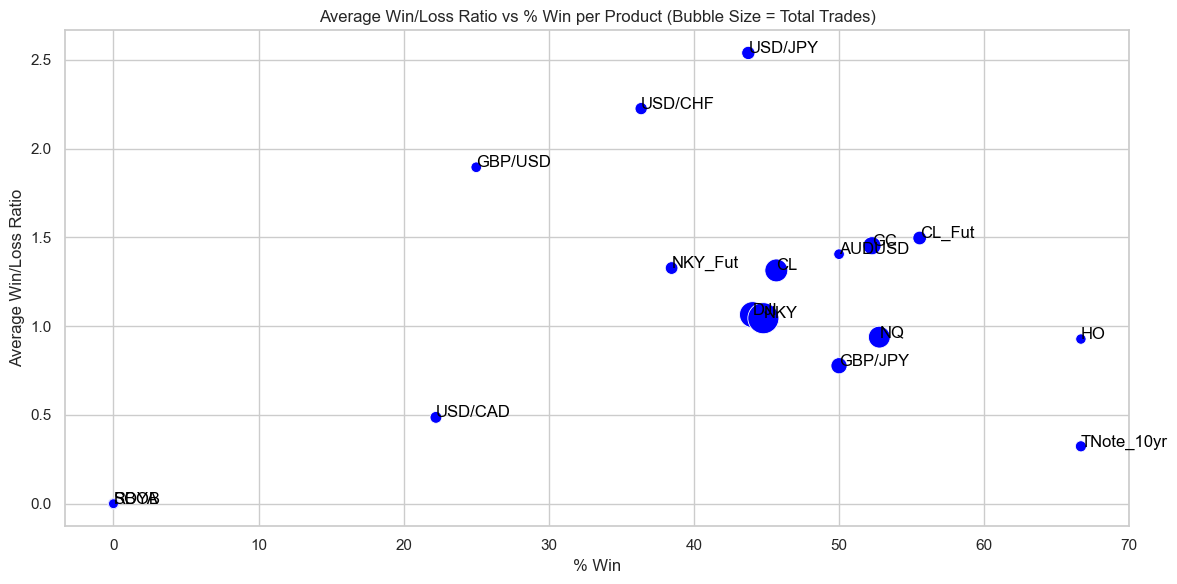

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the summary_df DataFrame with the necessary columns

# Calculate the Average Win/Loss Ratio if it doesn't already exist
summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# Exclude products 'DAX', 'SX5E', and 'NQ_Fut'
filtered_summary_df = summary_df[~summary_df['Product'].isin(['DAX', 'SX5E', 'NQ_Fut'])]

# Create a bubble scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='% Win', 
                 y='Average Win/Loss Ratio', 
                 size='Total Trades', 
                 sizes=(50, 500), 
                 data=filtered_summary_df, 
                 color='blue', 
                 legend=False)

# Set titles and labels
plt.title('Average Win/Loss Ratio vs % Win per Product (Bubble Size = Total Trades)')
plt.xlabel('% Win')
plt.ylabel('Average Win/Loss Ratio')

# Annotate each point with the product name
for i in range(len(filtered_summary_df)):
    plt.text(filtered_summary_df['% Win'].iloc[i], 
             filtered_summary_df['Average Win/Loss Ratio'].iloc[i], 
             filtered_summary_df['Product'].iloc[i], 
             horizontalalignment='left', size='medium', color='black')

# Show gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



In [34]:
print(summary_df.columns)  # Ensure to run this first to check the correct column names

Index(['Product', 'Total Trades', '% of Total Trades', 'Wins', 'Average Win',
       'Losses', 'Average Loss', 'Edge', '% Win', 'RRR', 'Win/Loss Ratio',
       'Average Win/Loss Ratio'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_15768\1651968032.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dji_losses = trades[trades['PRODUCT'] == 'DJI'][trades['PL'] < 0]['PL']
C:\Users\user\AppData\Local\Temp\ipykernel_15768\1651968032.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dji_losses, shade=True)


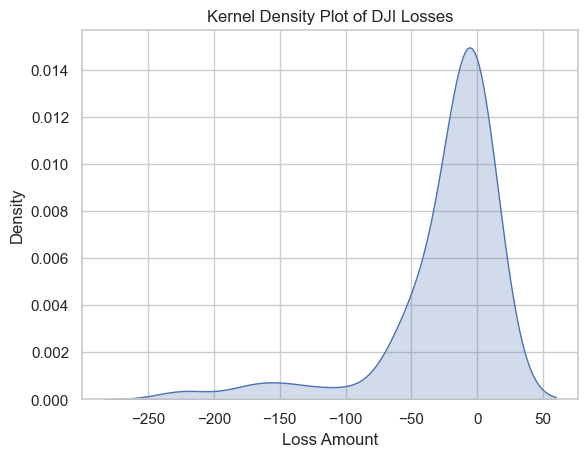

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


trades = pd.read_csv('refined_history.csv')
dji_losses = trades[trades['PRODUCT'] == 'DJI'][trades['PL'] < 0]['PL']

sns.kdeplot(dji_losses, shade=True)
plt.title('Kernel Density Plot of DJI Losses')
plt.xlabel('Loss Amount')
plt.ylabel('Density')
plt.show()

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Load your data
trades = pd.read_csv('refined_history.csv')

# Define the loss amount and range for probability estimation
loss_amount = -223.20
range_min = loss_amount - 10  # Adjust range as needed
range_max = loss_amount + 10

# Filter DJI losses
dji_losses = trades[(trades['PRODUCT'] == 'DJI') & (trades['PL'] < 0)]['PL']

# Create the kernel density estimate
kde = sns.kdeplot(dji_losses, shade=True)
plt.close()  # Close the plot as we don't need to display it

# Define the kernel density function (can be extracted from the KDE object)
def kernel_density(x):
    # Replace with the actual kernel function used by the KDE plot (e.g., Gaussian)
    # This is a placeholder for demonstration purposes
    return np.exp(-(x - loss_amount)**2 / (2 * 2.5**2))  # Example Gaussian kernel

# Calculate the probability within the specified range using numerical integration
probability, _ = quad(kernel_density, range_min, range_max)

print(f"Estimated probability of losing between ${range_min} and ${range_max}: {probability:.4f}")

Estimated probability of losing between $-233.2 and $-213.2: 6.2662


C:\Users\user\AppData\Local\Temp\ipykernel_15768\3583669792.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dji_losses, shade=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15768\3841844302.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(product_losses, shade=True, ax=axes[i // 2, i % 2])  # Plot on specific subplot
C:\Users\user\AppData\Local\Temp\ipykernel_15768\3841844302.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(product_losses, shade=True, ax=axes[i // 2, i % 2])  # Plot on specific subplot
C:\Users\user\AppData\Local\Temp\ipykernel_15768\3841844302.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(product_losses, shade=True, ax=axes[i // 2, i % 2])  # Plot on specific subplot
C:\Users\user\AppData\Local\Temp\ipykernel_15768\

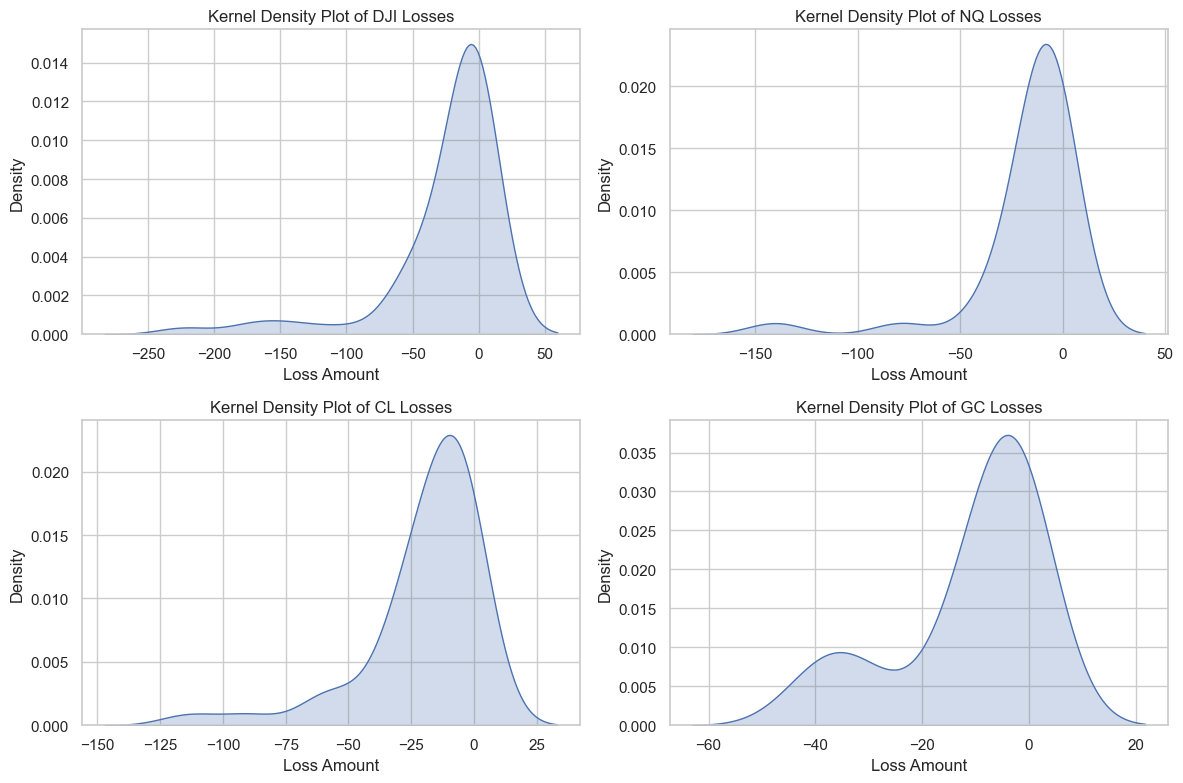

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (rest of your code, including data loading and filtering)

# Define a list of products to analyze
products = ['DJI', 'NQ', 'CL', 'GC']

# Create a figure with subplots (one for each product)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figsize as needed

# Loop through the products and create kernel density plots
for i, product in enumerate(products):
    # Filter data for the current product and losses
    product_losses = trades[(trades['PRODUCT'] == product) & (trades['PL'] < 0)]['PL']

    # Check if there are any losses for the current product
    if not product_losses.empty:
        sns.kdeplot(product_losses, shade=True, ax=axes[i // 2, i % 2])  # Plot on specific subplot

        # Customize plot for each product
        axes[i // 2, i % 2].set_title(f'Kernel Density Plot of {product} Losses')
        axes[i // 2, i % 2].set_xlabel('Loss Amount')
        axes[i // 2, i % 2].set_ylabel('Density')
    else:
        # Handle no losses case (optional)
        axes[i // 2, i % 2].text(0.5, 0.5, f"No loss data found for {product}", ha='center', va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ... (rest of your code, including data loading and filtering)

# Get the kernel density estimate for DJI losses
kde = gaussian_kde(dji_losses)

# Define a range of x-values
x_values = np.linspace(min(dji_losses), max(dji_losses), 100)

# Calculate the density values for each x-value
density_values = kde(x_values)

# Create a DataFrame with x-values and density values
density_df = pd.DataFrame({'Loss Amount': x_values, 'Density': density_values})

# Print the DataFrame
print(density_df)

    Loss Amount   Density
0   -223.200000  0.000349
1   -220.946768  0.000353
2   -218.693535  0.000355
3   -216.440303  0.000354
4   -214.187071  0.000352
..          ...       ...
95    -9.142929  0.014798
96    -6.889697  0.014945
97    -4.636465  0.014936
98    -2.383232  0.014766
99    -0.130000  0.014437

[100 rows x 2 columns]


Multi-Product Loss Distribution Plot

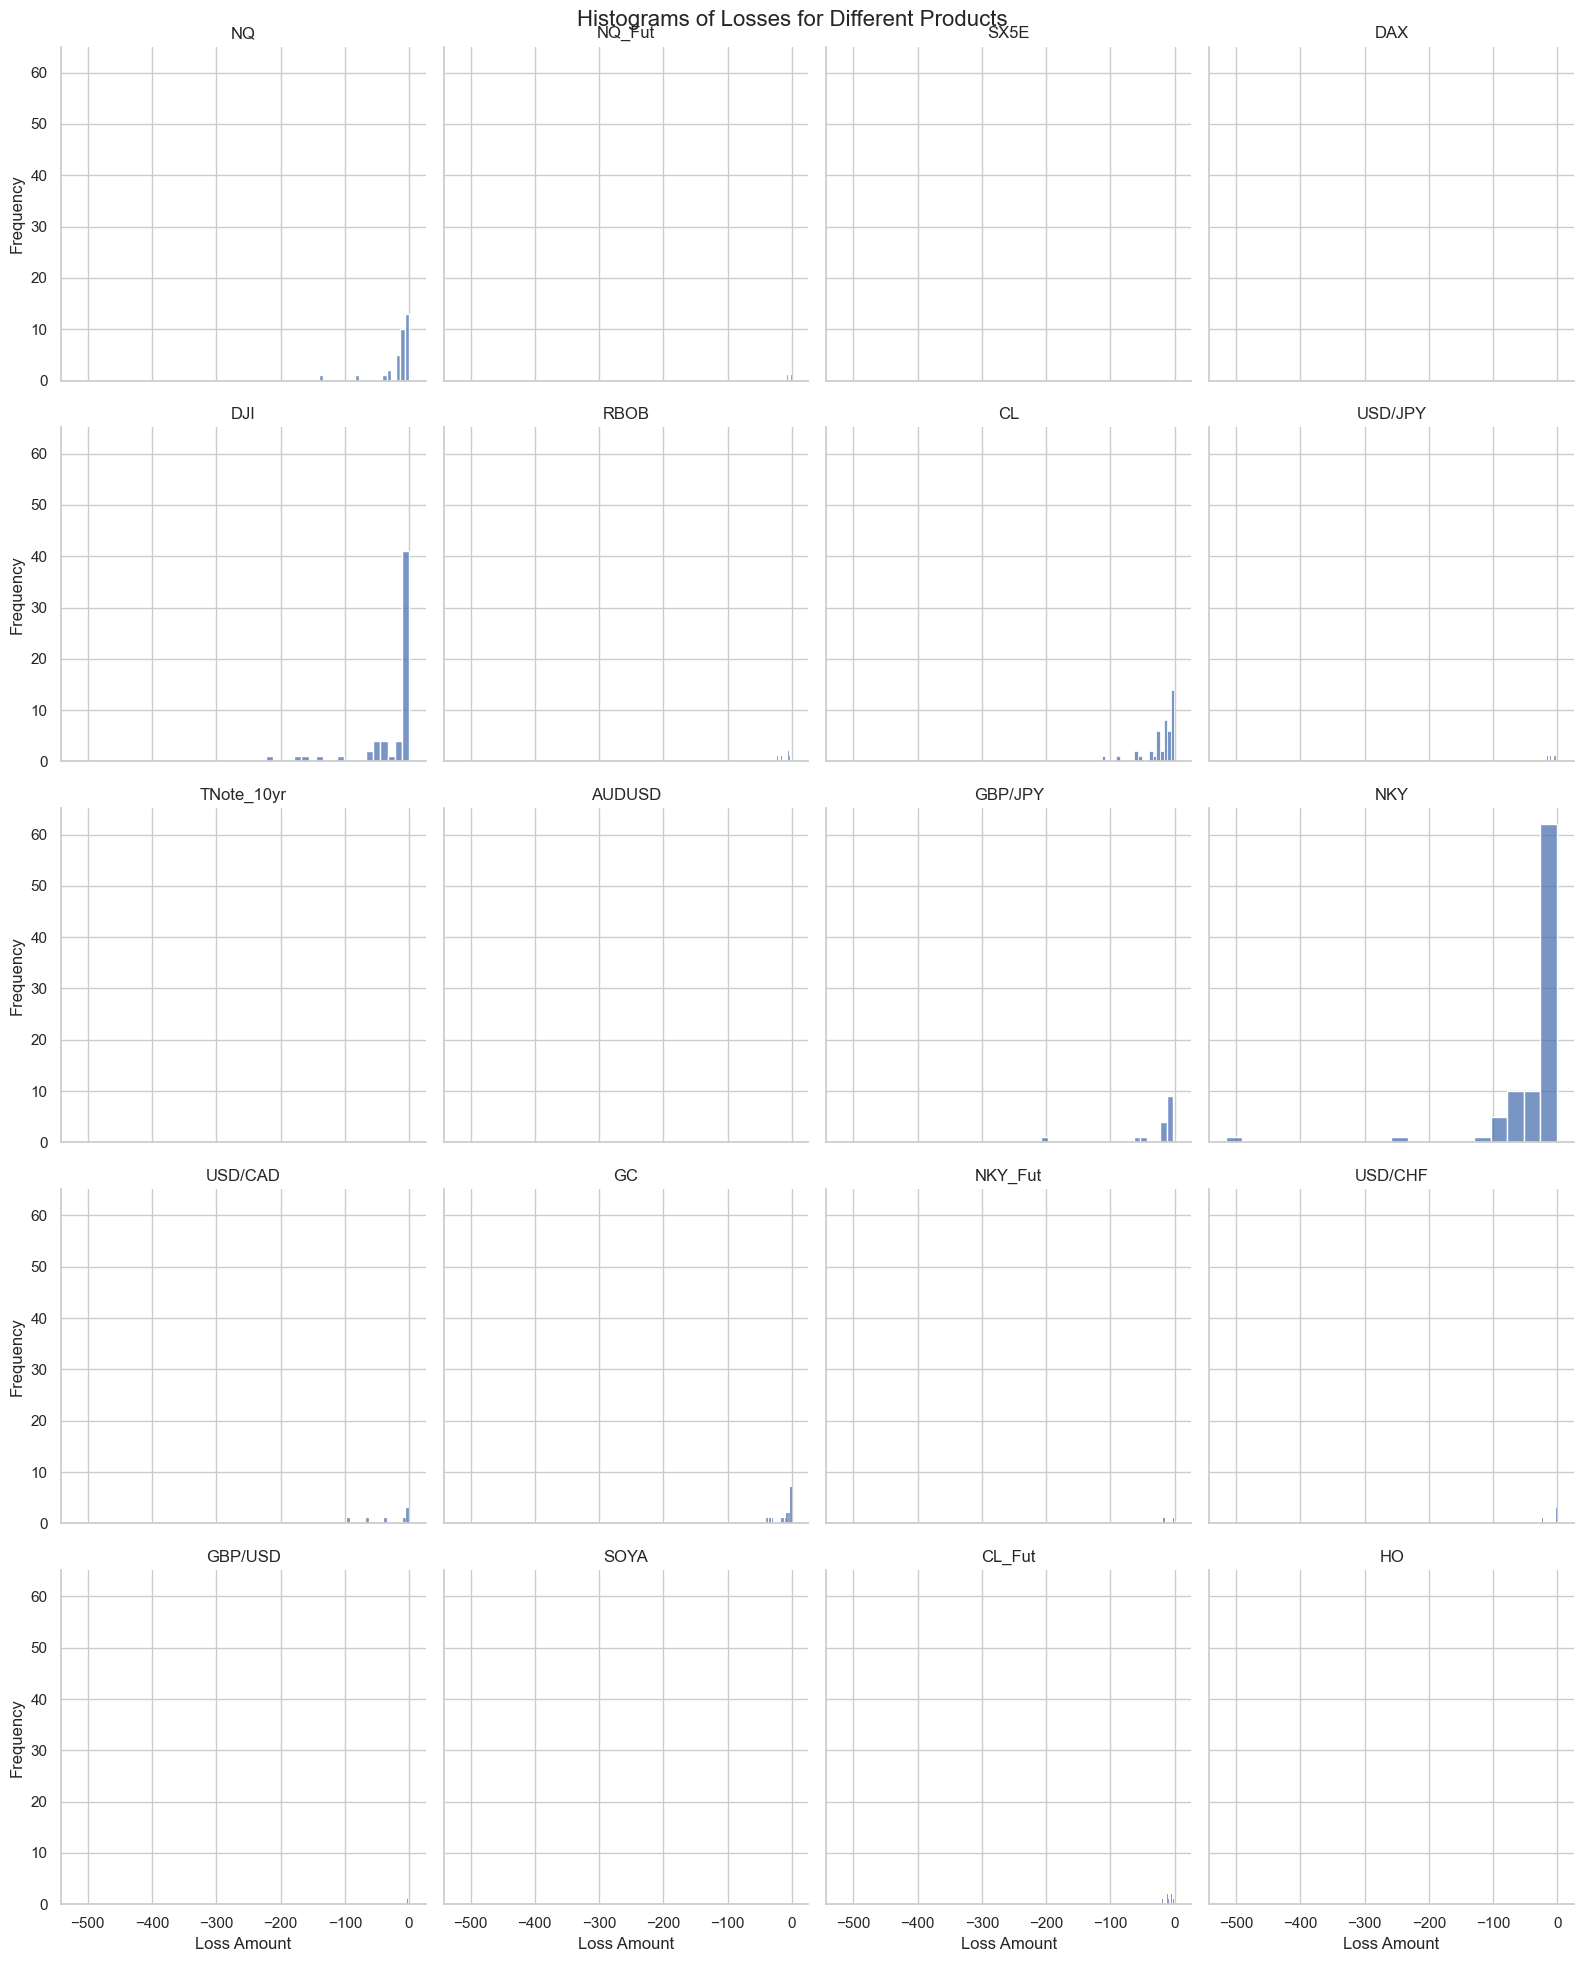

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (rest of your code, including data loading and filtering)

# Create a FacetGrid
g = sns.FacetGrid(trades[trades['PL'] < 0], col="PRODUCT", col_wrap=4, height=4)

# Plot histograms for each product (focusing on losses)
g.map(sns.histplot, "PL", bins=20)

# Customize the plot
g.fig.suptitle('Histograms of Losses for Different Products', fontsize=16)
g.set_axis_labels("Loss Amount", "Frequency")
g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()

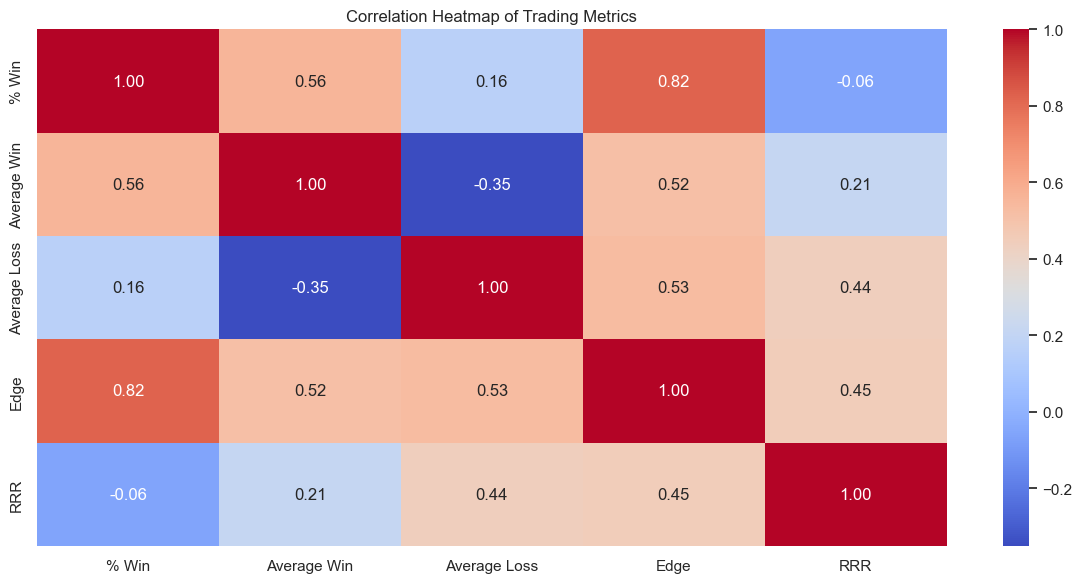

In [40]:
# Assuming you want to visualize the correlation between average win/loss and win rate
heatmap_data = summary_df[['Product', '% Win', 'Average Win', 'Average Loss', 'Edge','RRR']]
heatmap_data.set_index('Product', inplace=True)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Trading Metrics')
plt.tight_layout()
plt.show()

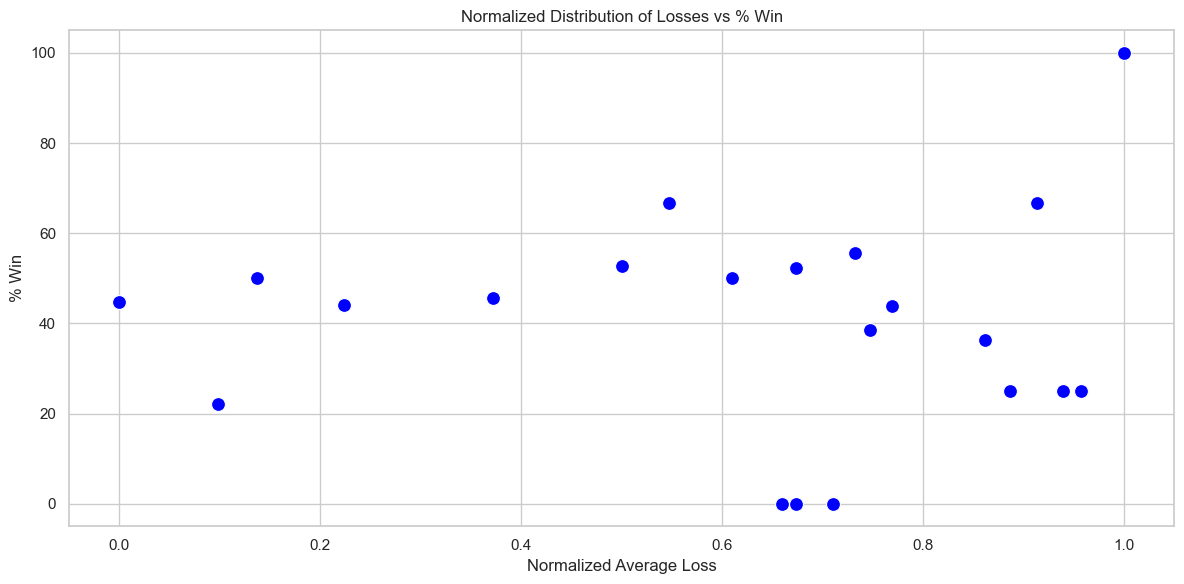

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming summary_df is your DataFrame with the necessary columns

# Normalize the losses
normalized_losses = (summary_df['Average Loss'] - summary_df['Average Loss'].min()) / (summary_df['Average Loss'].max() - summary_df['Average Loss'].min())

# Create a normalized scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=normalized_losses, y=summary_df['% Win'], color='blue', s=100)
plt.title('Normalized Distribution of Losses vs % Win')
plt.xlabel('Normalized Average Loss')
plt.ylabel('% Win')

# Show gridlines for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# Calculate correlation matrix excluding non-numeric columns
correlation_matrix = summary_df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        Total Trades  % of Total Trades      Wins  \
Total Trades                1.000000           1.000000  0.995894   
% of Total Trades           1.000000           1.000000  0.995892   
Wins                        0.995894           0.995892  1.000000   
Average Win                 0.603148           0.603177  0.607188   
Losses                      0.997040           0.997042  0.985986   
Average Loss               -0.697222          -0.697222 -0.684294   
Edge                       -0.106346          -0.106280 -0.074461   
% Win                       0.068569           0.068653  0.114235   
RRR                        -0.158645          -0.158763 -0.164455   
Win/Loss Ratio             -0.158645          -0.158763 -0.164455   
Average Win/Loss Ratio     -0.158645          -0.158763 -0.164455   

                        Average Win    Losses  Average Loss      Edge  \
Total Trades               0.603148  0.997040     -0.697222 -0.106346   
% of

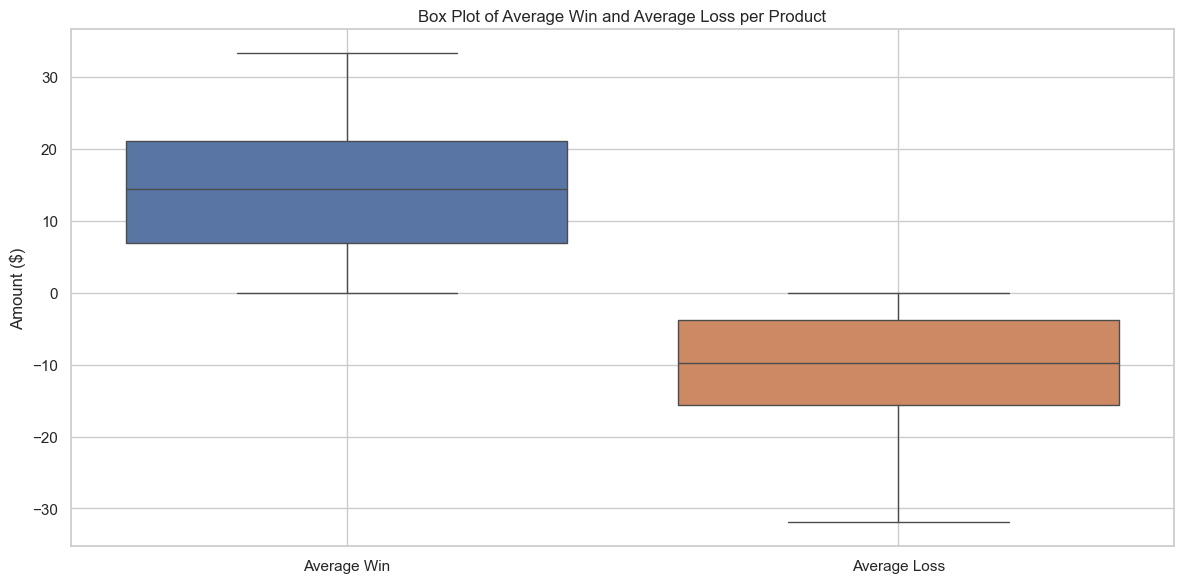

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=summary_df[['Average Win', 'Average Loss']])
plt.title('Box Plot of Average Win and Average Loss per Product')
plt.ylabel('Amount ($)')
plt.xticks([0, 1], ['Average Win', 'Average Loss'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd

# Load your trading data
# trades = pd.read_csv('refined_history.csv')

# Ensure 'DATE/TIME' is in datetime format
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Extract the date from the 'DATE/TIME' column
trades['Date'] = trades['DATE/TIME'].dt.date

# Prepare a results DataFrame
daily_summary = []

# Group data by Date
daily_groups = trades.groupby('Date')

for date, daily_data in daily_groups:
    total_trades = len(daily_data)
    
    # Calculate wins and losses
    wins = daily_data[daily_data['PL'] > 0]
    losses = daily_data[daily_data['PL'] <= 0]

    win_count = len(wins)
    loss_count = len(losses)

    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
    loss_rate = (loss_count / total_trades) * 100 if total_trades > 0 else 0

    edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

    total_stakes = daily_data['STAKE'].sum()  # Assuming 'STAKE' is a column in your DataFrame
    average_stake = daily_data['STAKE'].mean() if total_trades > 0 else 0

    # Find the product with the most stakes
    most_stakes_product = daily_data.groupby('PRODUCT')['STAKE'].sum().idxmax()

    # Find the biggest winning product
    biggest_winning_product = wins.groupby('PRODUCT')['PL'].sum().idxmax() if not wins.empty else None

    # Find the biggest losing product
    biggest_losing_product = losses.groupby('PRODUCT')['PL'].sum().idxmin() if not losses.empty else None

    # Append results to the summary DataFrame
    daily_summary.append({
        'Date': date,
        'Total Trades': total_trades,
        'Wins': win_count,
        'Average Win': average_win,
        'Losses': loss_count,
        'Average Loss': average_loss,
        '% Win': win_rate,
        '% Loss': loss_rate,
        'Edge': edge,
        'Total Stakes': total_stakes,
        'Average Stake': average_stake,
        'Most Stakes Product': most_stakes_product,
        'Biggest Winning Product': biggest_winning_product,
        'Biggest Losing Product': biggest_losing_product,
    })

# Create a DataFrame from the daily summary
daily_summary_df = pd.DataFrame(daily_summary)

# Display the results
print(daily_summary_df)


          Date  Total Trades  Wins  Average Win  Losses  Average Loss  \
0   2024-11-15             3     1    49.650000       2    -44.850000   
1   2024-11-18             2     2    45.880000       0      0.000000   
2   2024-11-19             3     2    26.145000       1     -0.390000   
3   2024-11-20            64    33    14.861515      31    -12.732903   
4   2024-11-21             6     2    26.625000       4    -37.680000   
5   2024-11-22             3     2     6.360000       1    -49.650000   
6   2024-11-24             2     1    16.930000       1    -96.600000   
7   2024-11-25            29    17    14.355882      12     -9.685833   
8   2024-11-26            86    42    34.771190      44    -28.677273   
9   2024-11-27             8     5    23.514000       3    -17.413333   
10  2024-11-28             1     1     0.320000       0      0.000000   
11  2024-11-29             7     2    11.750000       5    -27.882000   
12  2024-12-02            36    10    44.279000    

In [45]:
# import pandas as pd

# # Load your trading data
# # trades = pd.read_csv('refined_history.csv')

# # Ensure 'DATE/TIME' is in datetime format
# trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# # Extract the date from the 'DATE/TIME' column
# trades['Date'] = trades['DATE/TIME'].dt.date

# # Prepare a results DataFrame
# daily_summary = []

# # Group data by Date
# daily_groups = trades.groupby('Date')

# for date, daily_data in daily_groups:
#     total_trades = len(daily_data)
    
#     # Calculate wins and losses
#     wins = daily_data[daily_data['PL'] > 0]
#     losses = daily_data[daily_data['PL'] <= 0]

#     win_count = len(wins)
#     loss_count = len(losses)

#     average_win = wins['PL'].mean() if not wins.empty else 0
#     average_loss = losses['PL'].mean() if not losses.empty else 0

#     win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
#     loss_rate = (loss_count / total_trades) * 100 if total_trades > 0 else 0

#     edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

#     total_stakes = daily_data['STAKE'].sum()  # Assuming 'STAKE' is a column in your DataFrame
#     average_stake = daily_data['STAKE'].mean() if total_trades > 0 else 0

#     # Find the product with the most stakes
#     most_stakes_product = daily_data.groupby('PRODUCT')['STAKE'].sum().idxmax()

#     # Find the biggest winning product
#     biggest_winning_product = wins.groupby('PRODUCT')['PL'].sum().idxmax() if not wins.empty else None

#     # Find the biggest losing product
#     biggest_losing_product = losses.groupby('PRODUCT')['PL'].sum().idxmin() if not losses.empty else None

#     # Append results to the summary DataFrame
#     daily_summary.append({
#         'Date': date,
#         'Total Trades': total_trades,
#         'Wins': win_count,
#         'Average Win': average_win,
#         'Losses': loss_count,
#         'Average Loss': average_loss,
#         '% Win': win_rate,
#         '% Loss': loss_rate,
#         'Edge': edge,
#         'Total Stakes': total_stakes,
#         'Average Stake': average_stake,
#         'Most Stakes Product': most_stakes_product,
#         'Biggest Winning Product': biggest_winning_product,
#         'Biggest Losing Product': biggest_losing_product,
#     })

# # Create a DataFrame from the daily summary
# daily_summary_df = pd.DataFrame(daily_summary)

# # Specify the path to your refined_history file
# refined_history_path = 'refined_history.xlsx'  # Update with the actual path if necessary

# # Create an Excel writer object (this will create a new file if it doesn't exist)
# with pd.ExcelWriter(refined_history_path, engine='openpyxl', mode='a') as writer:
#     # Write the daily_summary_df to a new sheet named 'daily_summary'
#     daily_summary_df.to_excel(writer, sheet_name='daily_summary', index=False)

# print("Daily summary data saved to 'refined_history.xlsx' in the 'daily_summary' sheet.")


In [46]:
import pandas as pd

# Load your trading data
# trades = pd.read_csv('refined_history.csv')

# Ensure 'DATE/TIME' is in datetime format
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Extract the date from the 'DATE/TIME' column
trades['Date'] = trades['DATE/TIME'].dt.date

# Prepare a results DataFrame
daily_summary = []

# Calculate overall total trades for percentage calculation
overall_total_trades = len(trades)

# Group data by Date
daily_groups = trades.groupby('Date')

for date, daily_data in daily_groups:
    total_trades = len(daily_data)
    
    # Calculate wins and losses
    wins = daily_data[daily_data['PL'] > 0]
    losses = daily_data[daily_data['PL'] <= 0]

    win_count = len(wins)
    loss_count = len(losses)

    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
    loss_rate = (loss_count / total_trades) * 100 if total_trades > 0 else 0

    edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

    # Calculate Risk-Reward Ratio (RRR)
    rrr = average_win / abs(average_loss) if average_loss != 0 else None

    total_stakes = daily_data['STAKE'].sum()  # Assuming 'STAKE' is a column in your DataFrame
    average_stake = daily_data['STAKE'].mean() if total_trades > 0 else 0

    # Find the product with the most stakes
    most_stakes_product = daily_data.groupby('PRODUCT')['STAKE'].sum().idxmax()

    # Find the biggest winning product
    biggest_winning_product = wins.groupby('PRODUCT')['PL'].sum().idxmax() if not wins.empty else None

    # Find the biggest losing product
    biggest_losing_product = losses.groupby('PRODUCT')['PL'].sum().idxmin() if not losses.empty else None

    # Calculate percentage of trades for the day compared to overall total trades
    percentage_of_total_trades = (total_trades / overall_total_trades) * 100 if overall_total_trades > 0 else 0

    # Append results to the summary DataFrame
    daily_summary.append({
        'Date': date,
        'Total Trades': total_trades,
        '% of Total Trades': percentage_of_total_trades,  # New column for percentage of total trades
        'Wins': win_count,
        'Average Win': average_win,
        'Losses': loss_count,
        'Average Loss': average_loss,
        '% Win': win_rate,
        '% Loss': loss_rate,
        'Edge': edge,
        'RRR': rrr,  # Risk-Reward Ratio
        'Total Stakes': total_stakes,
        'Average Stake': average_stake,
        'Most Stakes Product': most_stakes_product,
        'Biggest Winning Product': biggest_winning_product,
        'Biggest Losing Product': biggest_losing_product,
    })

# Create a DataFrame from the daily summary
daily_summary_df = pd.DataFrame(daily_summary)

# Specify the path to your refined_history file
refined_history_path = 'refined_history.xlsx'  # Update with the actual path if necessary

# Create an Excel writer object (this will create a new file if it doesn't exist)
with pd.ExcelWriter(refined_history_path, engine='openpyxl', mode='a') as writer:
    # Write the daily_summary_df to a new sheet named 'daily_summary'
    daily_summary_df.to_excel(writer, sheet_name='daily_summary', index=False)

print("Daily summary data saved to 'refined_history.xlsx' in the 'daily_summary' sheet.")


Daily summary data saved to 'refined_history.xlsx' in the 'daily_summary' sheet.


In [47]:
summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

In [48]:
risk_management_issues = daily_summary_df[daily_summary_df['Edge'] < 0]
print("Days with negative edge (potential risk management issues):")
print(risk_management_issues[['Date', 'Edge', 'Average Loss']])



Days with negative edge (potential risk management issues):
          Date       Edge  Average Loss
0   2024-11-15 -13.350000    -44.850000
4   2024-11-21 -16.245000    -37.680000
5   2024-11-22 -12.310000    -49.650000
6   2024-11-24 -39.835000    -96.600000
11  2024-11-29 -16.558571    -27.882000
12  2024-12-02 -11.117500    -32.423846
14  2024-12-04  -0.238710     -3.778824
15  2024-12-05 -74.970556   -119.241667
18  2024-12-10  -0.706348    -13.730000


In [49]:
# First, ensure to import necessary libraries
import pandas as pd

# Your previous code to create daily_summary_df goes here

# Calculate mean and percentiles for key metrics
mean_values = daily_summary_df[['Total Trades', 'Wins', 'Average Win', 'Losses', 'Average Loss']].mean()
percentiles = daily_summary_df[['Average Win', 'Average Loss']].quantile([0.25, 0.5, 0.75])

print("Mean Values:")
print(mean_values)
print("\nPercentiles:")
print(percentiles)

# Calculate correlation matrix excluding non-numeric columns
correlation_matrix = daily_summary_df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Mean Values:
Total Trades    30.250000
Wins            13.800000
Average Win     27.424356
Losses          16.450000
Average Loss   -31.056049
dtype: float64

Percentiles:
      Average Win  Average Loss
0.25    14.159828    -39.472500
0.50    20.222000    -22.647667
0.75    36.885893     -8.586375

Correlation Matrix:
                   Total Trades  % of Total Trades      Wins  Average Win  \
Total Trades           1.000000           1.000000  0.988864    -0.147142   
% of Total Trades      1.000000           1.000000  0.988864    -0.147142   
Wins                   0.988864           0.988864  1.000000    -0.153328   
Average Win           -0.147142          -0.147142 -0.153328     1.000000   
Losses                 0.992233           0.992233  0.962672    -0.139459   
Average Loss           0.285283           0.285283  0.310548    -0.231244   
% Win                 -0.278042          -0.278042 -0.200277    -0.101803   
% Loss                 0.278042           0.278042  0.200277   

Mean Values:
Total Trades    30.250000
Wins            13.800000
Average Win     27.424356
Losses          16.450000
Average Loss   -31.056049
dtype: float64

Percentiles:
      Average Win  Average Loss
0.25    14.159828    -39.472500
0.50    20.222000    -22.647667
0.75    36.885893     -8.586375

Correlation Matrix:
                   Total Trades  % of Total Trades      Wins  Average Win  \
Total Trades           1.000000           1.000000  0.988864    -0.147142   
% of Total Trades      1.000000           1.000000  0.988864    -0.147142   
Wins                   0.988864           0.988864  1.000000    -0.153328   
Average Win           -0.147142          -0.147142 -0.153328     1.000000   
Losses                 0.992233           0.992233  0.962672    -0.139459   
Average Loss           0.285283           0.285283  0.310548    -0.231244   
% Win                 -0.278042          -0.278042 -0.200277    -0.101803   
% Loss                 0.278042           0.278042  0.200277   

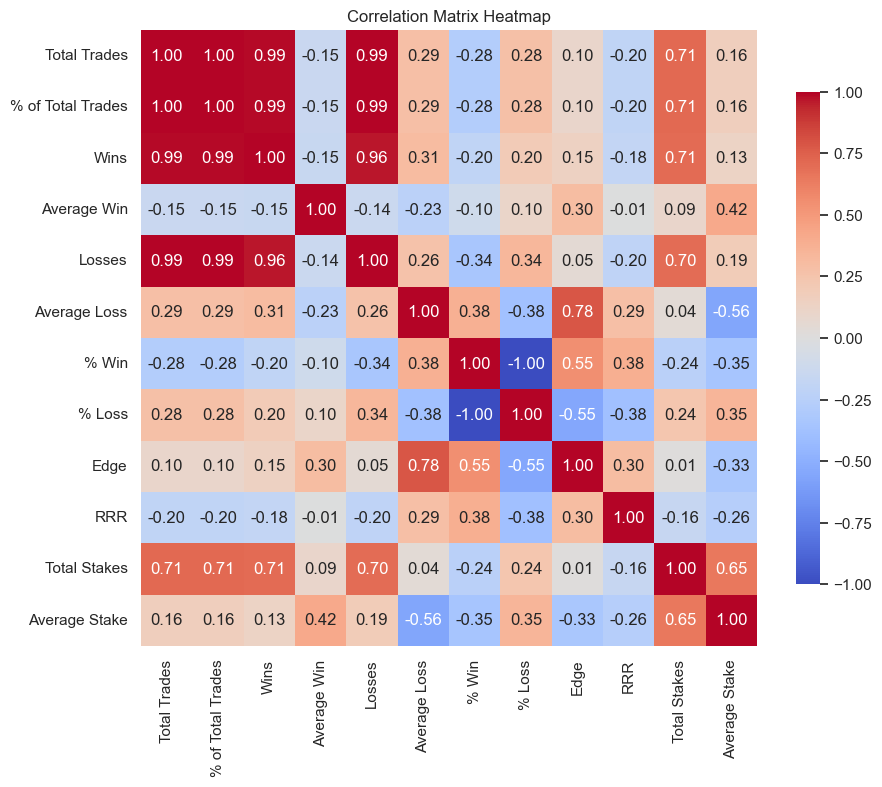

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your previous code to create daily_summary_df goes here

# Calculate mean and percentiles for key metrics
mean_values = daily_summary_df[['Total Trades', 'Wins', 'Average Win', 'Losses', 'Average Loss']].mean()
percentiles = daily_summary_df[['Average Win', 'Average Loss']].quantile([0.25, 0.5, 0.75])

print("Mean Values:")
print(mean_values)
print("\nPercentiles:")
print(percentiles)

# Calculate correlation matrix excluding non-numeric columns
correlation_matrix = daily_summary_df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()


In [51]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# # Load your trading data
# trades = pd.read_csv('refined_history.csv', usecols=['PRODUCT', 'PL'])

# # Get user input
# product_name = input("Enter the product name: ")
# try:
#     loss_amount = float(input("Enter the loss amount: "))
# except ValueError:
#     print("Invalid input for loss amount. Please enter a numerical value.")
#     exit()

# # Filter data for the specified product and losses
# product_losses = trades[(trades['PRODUCT'] == product_name) & (trades['PL'] < loss_amount)]['PL']

# # Sample a subset of data for larger datasets (optional)
# # product_losses = product_losses.sample(frac=0.5)  # Sample 50% of data

# # Create the kernel density estimate
# kde = gaussian_kde(product_losses)

# # Calculate the probability of losses exceeding the specified amount
# probability = 1 - kde.integrate_box_1d(-np.inf, loss_amount)

# print(f"The probability of losing more than ${loss_amount} for {product_name} is: {probability:.4f}")